### Student Information
Name: 黃科維

Student ID: r13922058

GitHub ID: egnkvn

Kaggle name: egnkvn

Kaggle private scoreboard snapshot:

![img/pic0.png](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__. 

In [2]:
### Begin Assignment Here

# First

### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


[nltk_data] Downloading package punkt to
[nltk_data]     /home/enginekevin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/enginekevin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipykernel_3128706/4130948670.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(train_words, rotation=45, ha='right')
/tmp/ipykernel_3128706/4130948670.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(test_words, rotation=45, ha='right')


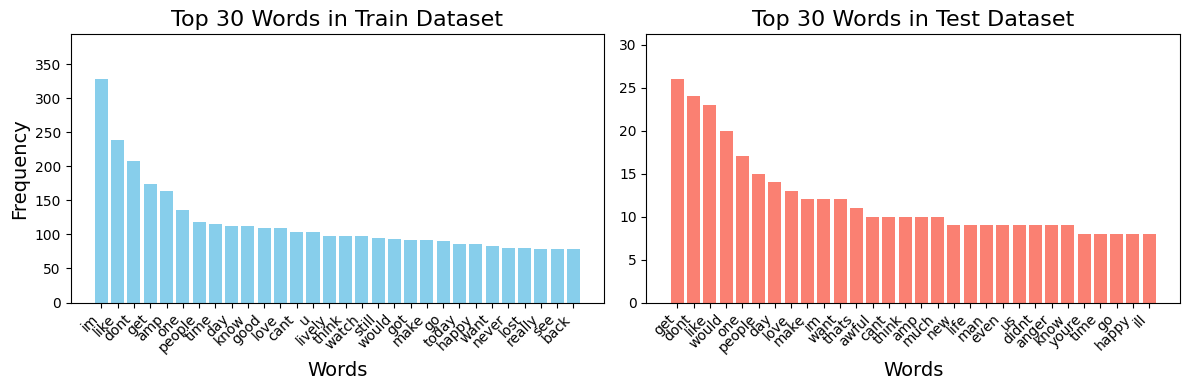

In [ ]:
# Answer here
import matplotlib.pyplot as plt
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

def get_word_frequencies(df):
    all_words = []
    for text in df['text']:
        all_words.extend(preprocess_text(text))
    return Counter(all_words)

def plot(train_word_freq, test_word_freq, top_n=30):
    train_common = train_word_freq.most_common(top_n)
    test_common = test_word_freq.most_common(top_n)
    train_words, train_counts = zip(*train_common)
    test_words, test_counts = zip(*test_common)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=False)
    
    # Plot Train dataset
    axes[0].bar(train_words, train_counts, color='skyblue')
    axes[0].set_title('Top 30 Words in Train Dataset', fontsize=16)
    axes[0].set_xticklabels(train_words, rotation=45, ha='right')
    axes[0].set_xlabel('Words', fontsize=14)
    axes[0].set_ylabel('Frequency', fontsize=14)
    axes[0].set_ylim(0, max(train_counts) * 1.2)

    # Plot Test dataset
    axes[1].bar(test_words, test_counts, color='salmon')
    axes[1].set_title('Top 30 Words in Test Dataset', fontsize=16)
    axes[1].set_xticklabels(test_words, rotation=45, ha='right')
    axes[1].set_xlabel('Words', fontsize=14)
    axes[1].set_ylim(0, max(test_counts) * 1.2)
    
    plt.tight_layout()
    plt.show()

train_word_freq = get_word_frequencies(train_df)
test_word_freq = get_word_frequencies(test_df)
plot(train_word_freq, test_word_freq)

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# Fit the vectorizer to the train dataset and transform the text into TF-IDF features
TFIDF_1000.fit(train_df['text'])
train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])
test_data_TFIDF_features_1000 = TFIDF_1000.transform(test_df['text'])

feature_names = TFIDF_1000.get_feature_names_out()
feature_names[100:110]

array(['attacks', 'awareness', 'away', 'awe', 'awesome', 'awful', 'b',
       'baby', 'back', 'bad'], dtype=object)

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [ ]:
# Answer here
'''
The diagonal values represent the number of correct predictions for each class.
The model performs best on the anger, which has the highest accuracy.
There is noticeable confusion between fear and anger.
'''

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [ ]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

## build model
NB_model = MultinomialNB()
## training!
NB_model.fit(X_train, y_train)

## predict!
y_train_pred_NB = NB_model.predict(X_train)
y_test_pred_NB = NB_model.predict(X_test)

## accuracy
acc_train_NB = accuracy_score(y_true=y_train, y_pred=y_train_pred_NB)
acc_test_NB = accuracy_score(y_true=y_test, y_pred=y_test_pred_NB)
print('Training Accuracy: {}'.format(round(acc_train_NB, 2)))
print('Testing Accuracy: {}'.format(round(acc_test_NB, 2)))

## precision, recall, f1-score,
print("Classification Report for Naive Bayes:")
print(classification_report(y_true=y_test, y_pred=y_test_pred_NB))

Training Accuracy: 0.79
Testing Accuracy: 0.71
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

       anger       0.65      0.67      0.66        84
        fear       0.74      0.81      0.77       110
         joy       0.77      0.70      0.73        79
     sadness       0.66      0.62      0.64        74

    accuracy                           0.71       347
   macro avg       0.71      0.70      0.70       347
weighted avg       0.71      0.71      0.71       347



---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [ ]:
# Answer here
'''
The Decision Tree model achieves an extremely high training accuracy (0.99), whereas the Naive Bayes model has a lower training accuracy (0.79). 
This suggests that the Decision Tree model is likely creating overly complex rules to fit the training data, while the Naive Bayes model generalizes 
better to unseen data instead of focusing on perfectly fitting the training set.

The testing accuracy further supports this observation: the Decision Tree model struggles with overfitting, whereas the Naive Bayes model demonstrates 
better generalization.
'''

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?


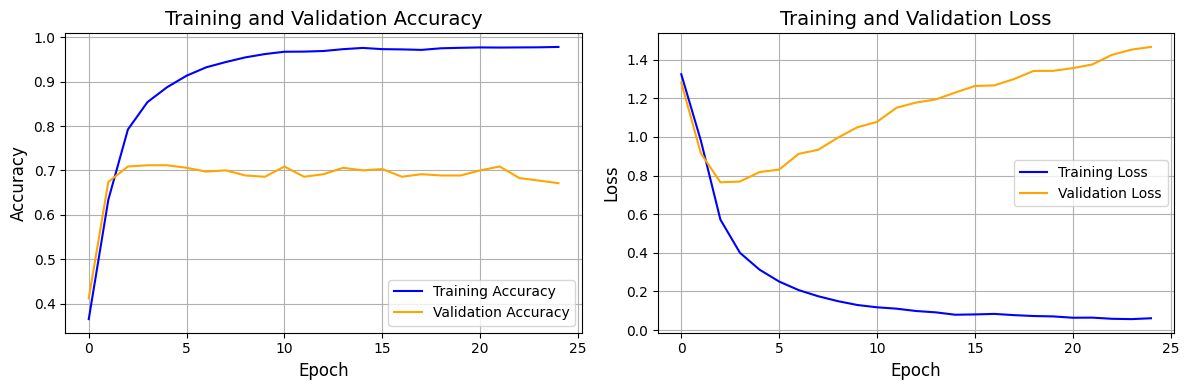

In [ ]:
# Answer here
'''
The validation accuracy increases and the loss decreases during the early epochs, but they do not improve with continued training.
The large gap between the high training accuracy and low validation accuracy suggests that the model is overfitting to the training data.
Furthermore, the diverging trend between training and validation loss further confirms overfitting.
'''
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot Training and Validation Accuracy
axes[0].plot(training_log['epoch'], training_log['accuracy'], label='Training Accuracy', color='blue')
axes[0].plot(training_log['epoch'], training_log['val_accuracy'], label='Validation Accuracy', color='orange')
axes[0].set_title('Training and Validation Accuracy', fontsize=14)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].legend()
axes[0].grid()
# Plot Training and Validation Loss
axes[1].plot(training_log['epoch'], training_log['loss'], label='Training Loss', color='blue')
axes[1].plot(training_log['epoch'], training_log['val_loss'], label='Validation Loss', color='orange')
axes[1].set_title('Training and Validation Loss', fontsize=14)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Answer here
'''
1. Averaging Word Vectors.
2. Weighted Averaging: weighted by TF-IDF scores.
3. RNNs: process the sequence of word vectors.
4. Using sentence embedding model: Doc2Vec, BERT.
'''


### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

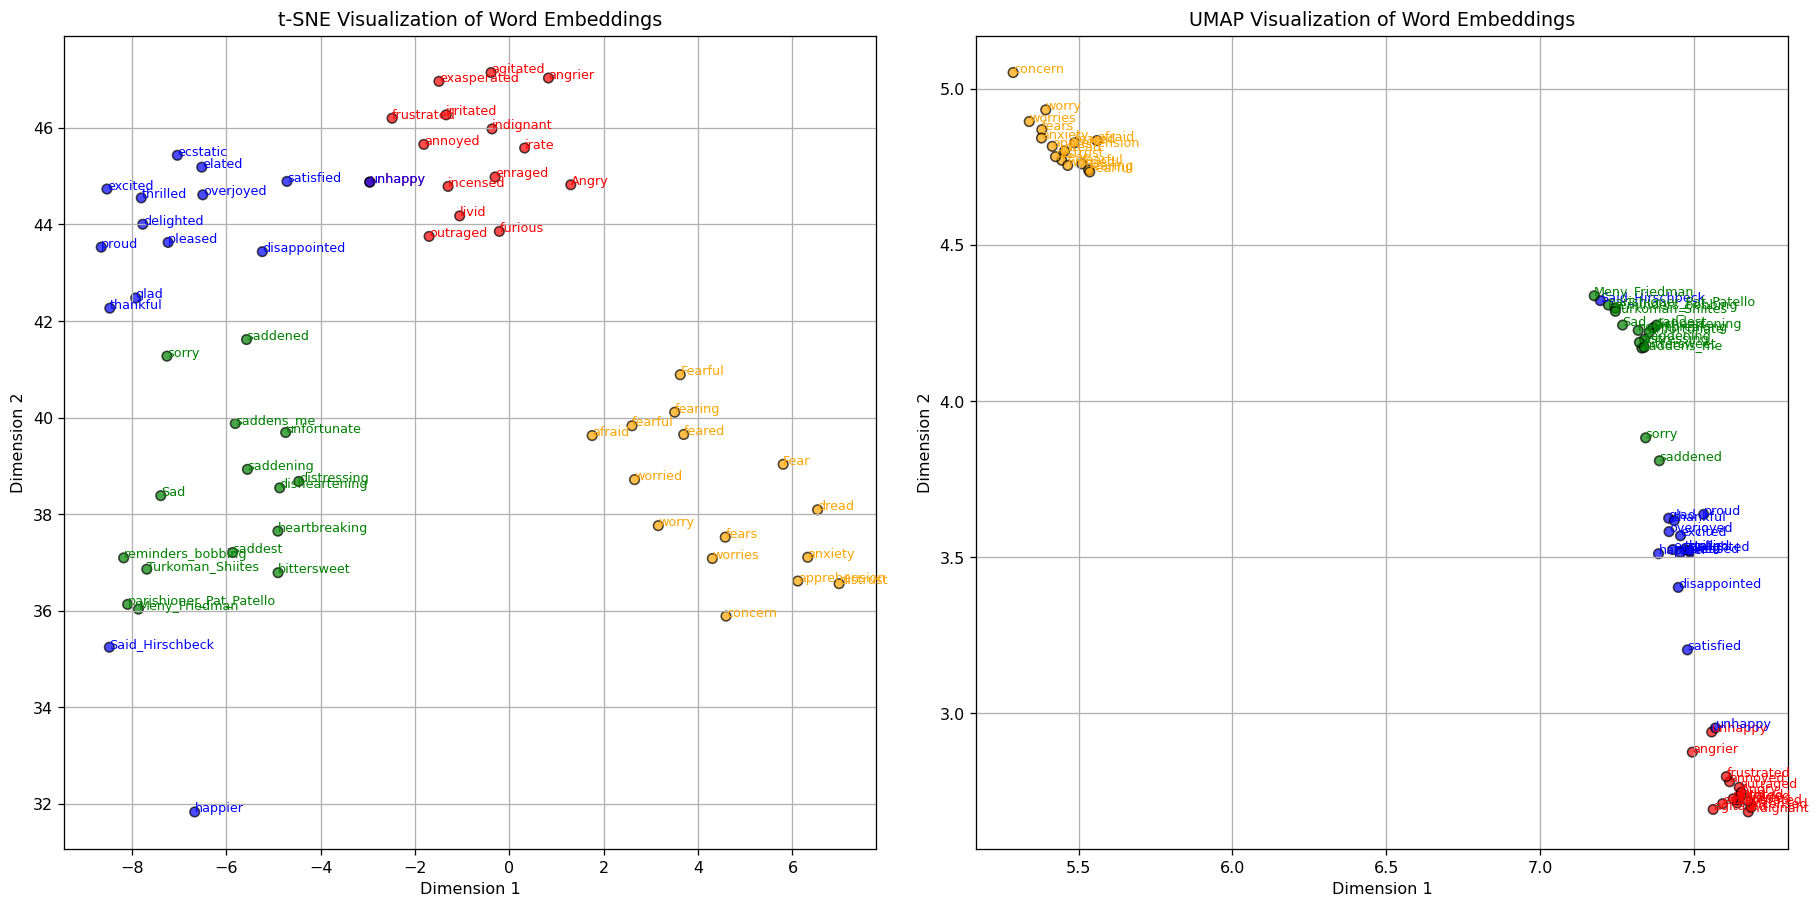

In [ ]:
'''
t-SNE:
    Preserve the local relationships between words, but relative distances between clusters may not reflect true relationships.
UMAP:
    Preserve both local and global relationships, and show smoother transitions between clusters, better for inter-cluster relationships.
'''
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap
import numpy as np

# Word2Vec model (assumed to be preloaded as `model`)
model = w2v_google_model

# Target words
target_words = ["angry", "happy", "sad", "fear"]

# Find 15 most similar words for each target word
category_colors = ["red", "blue", "green", "orange"]  # Colors for each category
related_words = []
word_categories = []  # To keep track of the category of each word
for i, word in enumerate(target_words):
    similar_words = [sim_word for sim_word, _ in model.most_similar(word, topn=15)]
    related_words.extend(similar_words)
    word_categories.extend([category_colors[i]] * (len(similar_words)))  # Assign color

size = 1000
target_size = len(related_words)
all_word = list(model.index_to_key)
word_train = related_words + all_word[:size]
X_train = model[word_train]

tsne = TSNE(n_components=2, metric='cosine', random_state=28)
X_tsne = tsne.fit_transform(X_train)
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)
X_umap = umap_model.fit_transform(X_train)

fig, axes = plt.subplots(1, 2, figsize=(16, 8), dpi=115)

# t-SNE plot
axes[0].scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=word_categories, alpha=0.7, edgecolor='k')
for label, x, y, color in zip(related_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1], word_categories):
    axes[0].annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=8, color=color)
axes[0].set_title("t-SNE Visualization of Word Embeddings")
axes[0].set_xlabel("Dimension 1")
axes[0].set_ylabel("Dimension 2")
axes[0].grid(True)
# UMAP plot
axes[1].scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=word_categories, alpha=0.7, edgecolor='k')
for label, x, y, color in zip(related_words, X_umap[:target_size, 0], X_umap[:target_size, 1], word_categories):
    axes[1].annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=8, color=color)
axes[1].set_title("UMAP Visualization of Word Embeddings")
axes[1].set_xlabel("Dimension 1")
axes[1].set_ylabel("Dimension 2")
axes[1].grid(True)

plt.tight_layout()
plt.show()


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

In [ ]:
# Answer here
'''
1.	system: Provides initial instructions to guide the assistant's behavior throughout the conversation.
2.	user: Represents messages from the user, typically containing questions or prompts.
3.	assistant: Represents responses generated by the AI assistant.
4.	tool: Indicates messages from external tools or functions the assistant can utilize.
'''
messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "What's the weather like today?"},
    {"role": "assistant", "content": "Let me check the weather for you."},
    {"role": "user", "content": "Do I need to bring the umbrella?"},
]


### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

In [ ]:
# Answer here
'''
Yes, it describes the animal and background in the image. I think the model has seen similar pictures during training.
'''
response4 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/lion.jpg'] 
    },
])

display(Markdown(response4['message']['content']))

In the heart of a verdant field, a majestic lion lies in repose. Its body, a rich tapestry of golden brown fur, contrasts beautifully with its black mane and tail. The lion's head is turned to the left, gazing intently into the distance as if surveying its domain or perhaps contemplating a meal.

The lion has chosen an unusual resting spot - a gray rock that stands out against the greenery. Its four paws are spread out comfortably on the rock's uneven surface, each claw digging into the stone as if claiming it as part of its territory. The rock is situated in the center of the image, drawing attention to the lion and emphasizing its presence.

The background is a blurred expanse of green grass, suggesting that this scene takes place in an open field or perhaps a wildlife reserve. The focus on the lion and its rock perch creates a sense of tranquility amidst what might be considered a natural habitat for such a creature.


### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [ ]:
# Answer here
'''
In url 1 and 2, model cannot answer my question about MLB news and player infomation correctly; in url 3, model's answer is correct.
Advertaege:
    1. RAG systems can dynamically fetch information from external sources, no need to extra training.
    2. RAG systems can easily adapt to specific domains
Disadvantage:
    1. The quality of the response depends heavily on the quality of the retrieved documents.
    2. Retrieval introduces additional time overhead compared to original model.
'''
def load_and_retrieve_docs_from_multiple_sources(sources):
    docs = []
    for source in sources:
        # Detect whether the source is a URL or plain text
        if source.startswith("http://") or source.startswith("https://"):
            loader = WebBaseLoader(
                web_paths=(source,),
                bs_kwargs=dict()
            )
            docs.extend(loader.load())
        else:
            # If it's a plain text document
            doc = {"page_content": source, "metadata": {"source": "text_document"}}
            docs.append(doc)
    
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
    splits = text_splitter.split_documents(docs)
    embeddings = OllamaEmbeddings(model=llm_model)
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)
    return vectorstore.as_retriever()
sources = [
    "https://www.mlb.com/news/questions-mvp-cy-young-manager-rookie-bbwaa-awards",
    "https://en.wikipedia.org/wiki/Shohei_Ohtani",
    "https://www.ibm.com/topics/large-language-models"
]
retriever = load_and_retrieve_docs_from_multiple_sources(sources)
prompts = [
    "Who are 2024's pitching Triple Crown in AL and NL?",
    "What is the nickname of Shohei Ohtani?",
    "What are the related solutions of IBM with LLMs?"
]

# Evaluate the RAG system
for i, prompt in enumerate(prompts):
    result = rag_chain(prompt)
    display(Markdown(f"**Response {i+1}:** {result}"))

**Response 1:** Unfortunately, the text does not mention the winners of the 2024 pitching Triple Crown in the AL and NL. However, I can tell you that the 2023 pitching Triple Crown winners were:

* American League (AL): Shane McClanahan (Tampa Bay Rays)
* National League (NL): Sandy Alcantara (Miami Marlins)

**Response 2:** The text does not mention Shohei Ohtani's nickname. It only mentions some of his impressive statistics from a season, but does not provide any information about a nickname.

**Response 3:** IBM's related solutions with LLMs include:

1. Watsonx.ai: IBM's Granite model series is the generative AI backbone for other IBM products like Watsonx Assistant and Watsonx Orchestrate.
2. Watsonx Assistant: A conversational AI platform that leverages the Granite model series to provide human-like responses to customer inquiries.
3. Watsonx Orchestrate: An AI-powered workflow automation platform that uses the Granite model series to streamline business processes.

These solutions demonstrate IBM's investment in LLMs and their ability to provide a range of applications and use cases for businesses, from conversational AI to workflow automation.

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

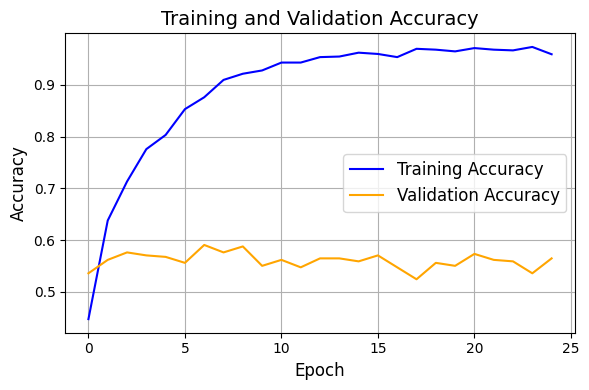

In [ ]:
# Answer here
'''
KNN works well with low-dimensional data but struggles with high-dimensional data like the embedding from LLMs.
NN are designed to handle high-dimensional data, achieves better performance compared to KNN on all metrics.

Both NB and DT are better suited for sparse and interpretable features, work well on simple text classification tasks.
LLM embeddings produce dense, high-dimensional vectors that capture semantic and contextual relationships, hard to interpret 
for simpler tasks like text classification. Additionally, NN requires larger datasets to learn meaningful patterns from 
these dense, high-dimensional embeddings. 
'''
import pandas as pd
import matplotlib.pyplot as plt

training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log_2.csv")

plt.figure(figsize=(6, 4))

plt.plot(training_log['epoch'], training_log['accuracy'], label='Training Accuracy', color='blue')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

In [ ]:
# Answer here
'''
Surprisingly, the zero-shot approach achieves the highest accuracy (0.49), while the 1-shot approach has the lowest accuracy (0.46). 
The model tends to answer “anger” across all methods. Additionally, the zero-shot model rarely answers “fear,” but in the 1-shot and 
5-shot approaches, the frequency of “fear” responses increases.

However, the model's output randomness is high, and the results vary with each attempt. Therefore, I believe the accuracy is not 
significantly influenced by the number of shots.
'''

# Second

In [ ]:
import pandas as pd
import json

identification = pd.read_csv("data/data_identification.csv")
emotion = pd.read_csv("data/emotion.csv")

records = []
with open('data/tweets_DM.json', "r") as f:
    for line in f:
        try:
            record = json.loads(line.strip())
            records.append(record)
        except json.JSONDecodeError as e:
            print(f"Error decoding line: {line}")
            continue

extracted_data = []
for item in records:
    tweet = item['_source']['tweet']
    tweet_id = tweet['tweet_id']
    text = tweet['text']
    if tweet_id and text:
        extracted_data.append({"tweet_id": tweet_id, "text": text})
tweet = pd.DataFrame(extracted_data)

data = pd.merge(identification, emotion, on="tweet_id", how="outer")
data = pd.merge(data, tweet, on="tweet_id", how="outer")

In [ ]:
from sklearn.model_selection import train_test_split

ori_train_df = data[data["identification"] == "train"].reset_index(drop=True)
ori_train_df.drop_duplicates(subset=['text'], keep=False, inplace=True)
ori_train_df_sample = ori_train_df.sample(frac=0.5, random_state=42) # Sample 50% for training

## TFIDF + RandomForest

In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

train_df, val_df = train_test_split(ori_train_df_sample, test_size=0.2, random_state=42)
test_df = data[data["identification"] == "test"].reset_index(drop=True)

TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
TFIDF_1000.fit(train_df['text'])
X_train = TFIDF_1000.transform(train_df['text'])
y_train = train_df['emotion']
X_val = TFIDF_1000.transform(val_df['text'])
y_val = val_df['emotion']
X_test = TFIDF_1000.transform(test_df['text'])


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RF_model = RandomForestClassifier()
RF_model = RF_model.fit(X_train, y_train)

y_train_pred = RF_model.predict(X_train)
y_val_pred = RF_model.predict(X_val)
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_val = accuracy_score(y_true=y_val, y_pred=y_val_pred)
print('Training accuracy: {:.2f}'.format(acc_train))
print('Validation accuracy: {:.2f}'.format(acc_val))

y_test_pred_NB = RF_model.predict(X_test)
test_df['emotion'] = y_test_pred_NB
save_df = test_df[['tweet_id', 'emotion']].rename(columns={'tweet_id': 'id'})
save_df.to_csv("data/submission.csv", index=False)

## BERT

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

train_texts, val_texts, train_labels, val_labels = train_test_split(
    ori_train_df['text'], ori_train_df['emotion'], test_size=0.2, random_state=42
)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

def tokenize_function(texts):
    return tokenizer(list(texts), padding=True, truncation=True, max_length=128, return_tensors="pt")

train_encodings = tokenize_function(train_texts)
val_encodings = tokenize_function(val_texts)
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
val_labels = label_encoder.transform(val_labels)


train_dataset = EmotionDataset(train_encodings, train_labels)
val_dataset = EmotionDataset(val_encodings, val_labels)

In [ ]:
from transformers import BertForSequenceClassification, AdamW, get_scheduler
from torch.utils.data import DataLoader
from tqdm import tqdm


model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(label_encoder.classes_))

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

optimizer = AdamW(model.parameters(), lr=5e-5)
epochs = 3
num_training_steps = len(train_loader) * epochs
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

for epoch in range(epochs):
    model.train()
    loop = tqdm(train_loader, leave=True)
    for batch in loop:
        batch = {k: v.to(device) for k, v in batch.items()}
        
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        
        loop.set_description(f"Epoch {epoch}")
        loop.set_postfix(loss=loss.item())

    model.eval()
    total, correct = 0, 0
    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=1)
            correct += (preds == batch["labels"]).sum().item()
            total += batch["labels"].size(0)

    print(f"Validation Accuracy: {correct / total:.4f}")
model.save_pretrained("emotion_classifier_model")
tokenizer.save_pretrained("emotion_classifier_model")

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import pandas as pd
import torch
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

test_df = data[data["identification"] == "test"].reset_index(drop=True)
model = BertForSequenceClassification.from_pretrained("emotion_classifier_model")
tokenizer = BertTokenizer.from_pretrained("emotion_classifier_model")

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)
model.eval()

def tokenize_function(texts):
    return tokenizer(list(texts), padding=True, truncation=True, max_length=128, return_tensors="pt")

test_encodings = tokenize_function(test_df['text'])
test_dataset = torch.utils.data.TensorDataset(
    test_encodings["input_ids"], test_encodings["attention_mask"]
)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False)

predictions = []
with torch.no_grad():
    for batch in tqdm(test_loader):
        input_ids, attention_mask = [b.to(device) for b in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        predictions.extend(preds.cpu().numpy())

label_encoder = LabelEncoder()
label_encoder.fit(train_df['emotion'])
test_df['emotion'] = label_encoder.inverse_transform(predictions)

save_df = test_df[['tweet_id', 'emotion']].rename(columns={'tweet_id': 'id'})
save_df.to_csv("data/submission.csv", index=False)

# Third